# Calculating Wire Twist Under Torque

For a cylinderical rod under torsion, the equation used to calculate the twist angle looks like this:

$$
\alpha = \frac{Q l}{J G}
$$

Where;

   - $\alpha$ is the twist angle in radians
   - $Q$ is the torque (in lb)
   - $J$ is the *polar moment of inertia*, 
   - $G$ is the shear (Young's) modulus
   - $l$ is the length of the rod
   - $r$ is the radius of the rod
   
The equation for $J$ for a rod with radius $r$ is given by:

$$
J = \pi \frac{r^4}{2}
$$

The shear modulus for music wire is about 11500000 $\frac{lb}{in^2}$

Let's do some calculations and see what we get. We will use the Python **pint** library to check the units in our calculations:

In [1]:
import math
from pint import UnitRegistry
ureg = UnitRegistry()

Q = 0.4 * (ureg.inch * ureg.oz)
l = 12 * (ureg.inch)
r = 0.0075 * (ureg.inch)  # 0.015 music wire
J = math.pi * r**4 / 2
G = 11500000 * (ureg.lb/ureg.inch**2) * 16 * (ureg.oz/ureg.lb)
alpha = Q * l / ( J * G)

The value of $\alpha$ is in *radians*, so we need to convert those to degrees to get our answer:

In [2]:
alpha_deg = alpha.to(ureg.degrees)
print(J, alpha, alpha_deg)

4.970097752749477e-09 inch ** 4 5.248781376041896 dimensionless 300.7330204340693 degree


**pint** is pretty handy for making sure all your engineering data is in the right form to feed into your equations.

Thhese numbers are about right for my indoor flying. A nice plan showing how to build one like this was produced by Cazar Banks can be found in the 

Let's plot the twist angle as a function of torque:

In [13]:
Q = 0.0 * (ureg.inch * ureg.oz)
xval = []
yval = []
for i in range(50):
    alpha_deg  = (Q * l / ( J * G)).to(ureg.degrees)
    xval.append(Q.magnitude)
    yval.append(alpha_deg.magnitude)
    Q = Q + 0.01 * (ureg.inch * ureg.oz)

0.0 inch * ounce 0.0 degree
0.01 inch * ounce 7.518325510851732 degree
0.02 inch * ounce 15.036651021703465 degree
0.03 inch * ounce 22.554976532555195 degree
0.04 inch * ounce 30.07330204340693 degree
0.05 inch * ounce 37.591627554258665 degree
0.060000000000000005 inch * ounce 45.10995306511039 degree
0.07 inch * ounce 52.62827857596213 degree
0.08 inch * ounce 60.14660408681386 degree
0.09 inch * ounce 67.66492959766559 degree
0.09999999999999999 inch * ounce 75.1832551085173 degree
0.10999999999999999 inch * ounce 82.70158061936904 degree
0.11999999999999998 inch * ounce 90.21990613022076 degree
0.12999999999999998 inch * ounce 97.73823164107249 degree
0.13999999999999999 inch * ounce 105.25655715192423 degree
0.15 inch * ounce 112.77488266277597 degree
0.16 inch * ounce 120.29320817362772 degree
0.17 inch * ounce 127.81153368447943 degree
0.18000000000000002 inch * ounce 135.32985919533118 degree
0.19000000000000003 inch * ounce 142.84818470618293 degree
0.20000000000000004 inch *

Now, we can plot this data to see the results:

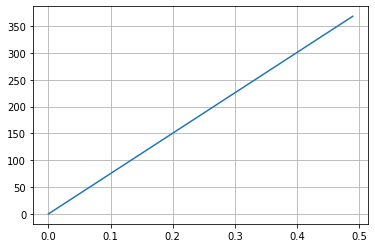

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xval, yval)
plt.grid()
plt.show()

It looks like this code works. We can use this to set up a meter for our experiments.